Found 943 files belonging to 2 classes.
Using 849 files for training.
Found 943 files belonging to 2 classes.
Using 94 files for validation.
Epoch 1/15
27/27 - 5s - 200ms/step - accuracy: 0.5995 - loss: 0.7878 - val_accuracy: 0.7128 - val_loss: 0.6075 - learning_rate: 0.0010
Epoch 2/15
27/27 - 3s - 117ms/step - accuracy: 0.7232 - loss: 0.5446 - val_accuracy: 0.7553 - val_loss: 0.5011 - learning_rate: 0.0010
Epoch 3/15
27/27 - 3s - 115ms/step - accuracy: 0.7515 - loss: 0.4939 - val_accuracy: 0.8191 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 4/15
27/27 - 3s - 121ms/step - accuracy: 0.8068 - loss: 0.4541 - val_accuracy: 0.7872 - val_loss: 0.4782 - learning_rate: 0.0010
Epoch 5/15
27/27 - 3s - 122ms/step - accuracy: 0.8045 - loss: 0.4324 - val_accuracy: 0.8191 - val_loss: 0.4012 - learning_rate: 0.0010
Epoch 6/15
27/27 - 3s - 116ms/step - accuracy: 0.8186 - loss: 0.4102 - val_accuracy: 0.8085 - val_loss: 0.4718 - learning_rate: 0.0010
Epoch 7/15
27/27 - 3s - 114ms/step - accuracy: 0.

Current validation accuracy: 0.8404255509376526
Reseting all weights...
Current number of trials: 1


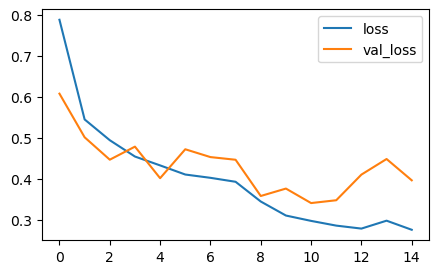

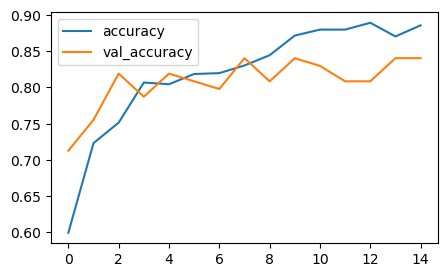

['loss', 'compile_metrics']
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8421 - loss: 0.4127
[0.3960628807544708, 0.8404255509376526]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Classification Report:
               precision    recall  f1-score   support

      Female       0.77      0.90      0.83        41
        Male       0.91      0.79      0.85        53

    accuracy                           0.84        94
   macro avg       0.84      0.85      0.84        94
weighted avg       0.85      0.84      0.84        94

Found 943 files belonging to 2 classes.
Using 849 files for training.
Found 943 files belonging to 2 classes.
Using 94 files for validation.
Epoch 1/15
27/27 - 5s - 203ms/step - accuracy: 0.5230 - loss: 1.0218 - val_accuracy: 0.6809 - val_loss: 0.6753 - learning_rate: 0.0010
Epoch 2/15
27/27 - 3s - 116ms/step - accuracy: 0.6737 - loss: 0.6170 - val_accuracy: 0.7340 - val_loss: 0.5956 - learning_rate: 0.0010
Epoch 3/15
27/27 - 3s - 117ms/step - accuracy: 0.7161 - los

Current validation accuracy: 0.8829787373542786
Reseting all weights...
Current number of trials: 2


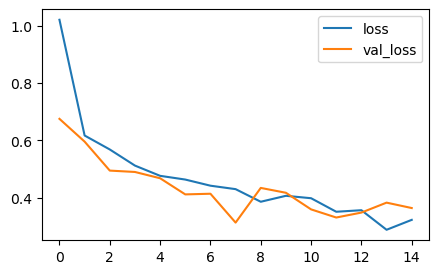

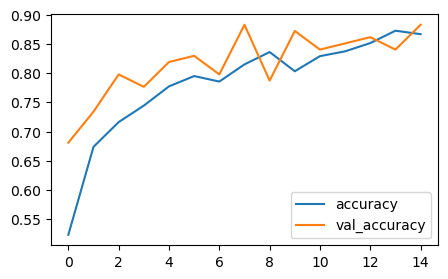

['loss', 'compile_metrics']
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8751 - loss: 0.4117
[0.3632667362689972, 0.8829787373542786]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Classification Report:
               precision    recall  f1-score   support

      Female       0.80      0.98      0.88        41
        Male       0.98      0.81      0.89        53

    accuracy                           0.88        94
   macro avg       0.89      0.89      0.88        94
weighted avg       0.90      0.88      0.88        94



,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.522968,1.021788,0.680851,0.675278,0.0010
1,0.673734,0.616975,0.734043,0.595561,0.0010
2,0.716137,0.568125,0.797872,0.494250,0.0010
3,0.744405,0.511750,0.776596,0.489457,0.0010
4,0.777385,0.475935,0.819149,0.467465,0.0010
5,0.795053,0.462921,0.829787,0.410999,0.0010
6,0.785630,0.441452,0.797872,0.413309,0.0010
7,0.815077,0.429393,0.882979,0.312333,0.0010
8,0.836278,0.385276,0.787234,0.433662,0.0010
9,0.803298,0.406090,0.872340,0.416671,0.0010


In [1]:
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow as tf
import os


ACC=0.1
try_num = 1

while (ACC<0.88 and try_num<10):
    # DOE factors:
    learning_rate = 0.001
    dropout_value = 0.3
    # n-conv_layers = 3
    n_units_last_layer = 2048
    n_filters_l1 = 16
    n_filters_l2 = 32
    
    # other factors:
    img_size = 130
    batch_size = 32
    validation_split = 0.1  # 10% for validation
    test_split = 0.00  # 0% for testing
    shuffle_buffer_size = 1000
    seed_num = 101
    desired_accuracy = 0.99  # it should be active if EarlyStoppingCallback is activated
    loss = 'binary_crossentropy'
    #optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    metrics = ['accuracy']
    epochs = 15
    f_mode = 'nearest'  # fill_mode in image augmentation
    
    DATA_DIR = "D:\\CS online courses\\Free DataSets\\Free Images\\Easier portrait images_GPU_03"
    #DATA_DIR = "/Users/hossein/Downloads/Easier portrait images_GPU_03"
    
    # Subdirectories for each class
    data_dir_woman = os.path.join(DATA_DIR, 'woman')
    data_dir_man = os.path.join(DATA_DIR, 'man')
    image_size = (img_size, img_size)  # Resize images to this size
    
    # Load train dataset (excluding validation & test set):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory = DATA_DIR,
        image_size = image_size,
        batch_size = batch_size,
        label_mode='binary',
        validation_split = validation_split + test_split,  # Total split for val + test
        subset = "training",
        seed = seed_num
    )
    # Load validation dataset
    val_dataset = tf.keras.utils.image_dataset_from_directory(
        directory = DATA_DIR,
        image_size = image_size,
        batch_size = batch_size,
        label_mode='binary',
        validation_split = validation_split + test_split,
        subset = "validation",
        seed = seed_num
    )
    # Further manually split validation dataset to extract test dataset
    val_batches = tf.data.experimental.cardinality(val_dataset)
    # Compute test dataset size (number of batches)
    test_size = round(val_batches.numpy() * (test_split / (validation_split + test_split)))
    # Split validation dataset into validation and test subsets
    test_dataset = val_dataset.take(test_size)
    val_dataset = val_dataset.skip(test_size)
    # Optimize for performance
    AUTOTUNE = tf.data.AUTOTUNE
    training_dataset = train_dataset.cache().shuffle(shuffle_buffer_size).prefetch(buffer_size = AUTOTUNE)
    validation_dataset = val_dataset.cache().prefetch(buffer_size = AUTOTUNE)
    test_dataset = test_dataset.cache().prefetch(buffer_size = AUTOTUNE)
    
    # Get the first batch of images and labels
    for images, labels in training_dataset.take(1):
    	example_batch_images = images
    	example_batch_labels = labels
    max_pixel = np.max(example_batch_images)
    
    def scheduler(epoch, lr):
        if epoch < 10:
            if epoch % 5 == 0 and epoch > 0:
                return lr / 1
            return lr
        elif epoch < 15:
            if epoch % 5 == 0 and epoch > 0:
                return lr / 2
            return lr
        elif epoch < 30:
            if epoch % 5 == 0 and epoch > 0:
                return lr / 1
            return lr
        return lr
    lr_callback = LearningRateScheduler(scheduler)
    
    # augmentation_model
    def augment_model():
        augmentation_model = tf.keras.Sequential([
            # Specify the input shape.
            tf.keras.Input(shape = (img_size, img_size, 3)),
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1, fill_mode = f_mode),
            #tf.keras.layers.RandomTranslation(0.1, 0.1, fill_mode = f_mode),
            #tf.keras.layers.RandomZoom(0.1, fill_mode=f_mode)
            ])
        return augmentation_model
    
    def create_and_compile_model():
        augmentation_layers = augment_model()
        model = tf.keras.Sequential([
            # Note: the input shape is the desired size of the image: 150x150 with 3 bytes for color
            tf.keras.layers.InputLayer(shape = (img_size, img_size, 3)),
            augmentation_layers,
            tf.keras.layers.Rescaling(1./255),
            #####    CONV_LAYER_1:     #####
            tf.keras.layers.Conv2D(n_filters_l1, (4, 4), activation = 'linear'),
            tf.keras.layers.MaxPooling2D(2, 2),
            #####    CONV_LAYER_2:     #####
            tf.keras.layers.Conv2D(n_filters_l2, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            #####    CONV_LAYER_3:     #####
            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(dropout_value),
            #####    BEFORE_LAST_LAYER:     #####
            tf.keras.layers.Dense(n_units_last_layer, activation = 'relu'),
            # It will contain a value from 0-1 where 0 for the class 'female' and 1 for the 'male'
            tf.keras.layers.Dense(1, activation = 'sigmoid')]) 
        model.compile(
            loss = loss,
            optimizer = optimizer,
            metrics = metrics
        )
        return model


    # Create the compiled but untrained model
    def reset_weights(model):
        for layer in model.layers:
            if hasattr(layer, 'kernel_initializer'):
                layer.kernel.assign(layer.kernel_initializer(layer.kernel.shape))
            if hasattr(layer, 'bias_initializer'):
                layer.bias.assign(layer.bias_initializer(layer.bias.shape))

    model = create_and_compile_model()
    reset_weights(model)  # Reset all layer weights
    training_history = model.fit(training_dataset, 
                                 epochs=epochs, 
                                 validation_data=validation_dataset, 
                                 callbacks=[lr_callback], 
                                 verbose=2)
    result_history = pd.DataFrame(model.history.history)
    ACC = result_history['val_accuracy'].iloc[-1]
    print(f"Current validation accuracy: {ACC}")
    model.save('trained_model_run52_advanced_control.h5')
    # Restart script
    print("Reseting all weights...")
    print(f'Current number of trials: {try_num}')
    try_num += 1
    result_history[['loss', 'val_loss']].plot(figsize=(5, 3))
    result_history[['accuracy', 'val_accuracy']].plot(figsize=(5, 3))
    plt.show()
    print(model.metrics_names)
    print(model.evaluate(validation_dataset))
    y_true = np.concatenate([y.numpy() for _, y in validation_dataset])
    y_pred_prob = model.predict(validation_dataset)
    # Convert probabilities to class labels (0:Female or 1:Male)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Female', 'Male']))

result_history.head(15)
